On a typical day in the United States, police officers make more than 50,000 traffic stops. People at [The Stanford Open Policing Project](https://openpolicing.stanford.edu/) have gathered and analyzed millions of traffic stops by law enforcement agencies across the country.

Here i have tried to analyze their data about the state of **Road Islands**. By analyzing the data set, most of my hypothesis are proved to be wrong. For instance the rate of arresting between males and females or between the different races. It is a very intersting data set with surprising results!  

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read csv.gz file into a DataFrame
ri = pd.read_csv('RI-clean.csv.gz')

C:\Users\alisa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1) EDA

In [3]:
# Examine the first five rows of DataFrame
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [4]:
# Shape of the DataFrame
ri.shape

(509681, 26)

In [5]:
# Columns
ri.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

In [6]:
# Count the number of missing values in each column
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [7]:
# Dropping 'id', 'state' and all columns that are filled with NAN since they are not useful!
ri.drop(['id','state','county_name','county_fips','fine_grained_location'], axis='columns', inplace=True)
ri.shape

(509681, 21)

In [8]:
# # Count the number of missing values in each column
ri.isnull().sum()

stop_date                 10
stop_time                 10
location_raw               0
police_department         10
driver_gender          29097
driver_age_raw         29049
driver_age             30695
driver_race_raw        29073
driver_race            29073
violation_raw          29073
violation              29073
search_conducted          10
search_type_raw       491919
search_type           491919
contraband_found           0
stop_outcome           29073
is_arrested            29073
stop_duration          29073
out_of_state           29881
drugs_related_stop         0
district                   0
dtype: int64

### driver_gender

In [9]:
# Examine the 'driver_gender' column 
ri['driver_gender'].head()

0      M
1      M
2    NaN
3      M
4      M
Name: driver_gender, dtype: object

In [10]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)
ri.isnull().sum()

stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender              0
driver_age_raw             1
driver_age              1638
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw       462822
search_type           462822
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
out_of_state             808
drugs_related_stop         0
district                   0
dtype: int64

In [11]:
ri.shape

(480584, 21)

### is_arrested

In [12]:
# Examine the 'is_arrested' column 
ri['is_arrested'].head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [13]:
# Change the data type of 'is_arrested' from 'object' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri['is_arrested'].head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: bool

### search_conducted

In [14]:
# Examine the 'search_conducted' column 
ri['search_conducted'].head()

0    False
1    False
3    False
4    False
5    False
Name: search_conducted, dtype: object

In [15]:
# Change the data type of 'search_conducted' from 'object' to 'bool'
ri['search_conducted'] = ri.search_conducted.astype('bool')
ri['search_conducted'].head()

0    False
1    False
3    False
4    False
5    False
Name: search_conducted, dtype: bool

### stop_datetime as index

In [16]:
# Examine the 'stop_date' column
ri['stop_date'].head()

0    2005-01-02
1    2005-01-02
3    2005-01-04
4    2005-01-06
5    2005-01-12
Name: stop_date, dtype: object

In [17]:
# Examine the 'stop_time' column
ri['stop_time'].head()

0    01:55
1    20:30
3    12:55
4    01:30
5    08:05
Name: stop_time, dtype: object

In [18]:
# Concatenate 'stop_date' and 'stop_time'
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined.head()

0    2005-01-02 01:55
1    2005-01-02 20:30
3    2005-01-04 12:55
4    2005-01-06 01:30
5    2005-01-12 08:05
Name: stop_date, dtype: object

In [19]:
# Convert combined to 'datetime' format and put it in a new column 'stop_datetime'
ri['stop_datetime'] = pd.to_datetime(combined)
ri.dtypes

stop_date                     object
stop_time                     object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [20]:
# Set 'stop_datetime' as the 'index'
ri.set_index('stop_datetime', inplace=True)
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

In [21]:
ri.columns

Index(['stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

The whole idea of research in this section, is to discover if there is a difference behaviour with regards to **female** and **male** drivers by **police officers** when the drivers are commiting a **crime!** If yes or not, we can understand how!

# 2) Comparison of violation between drivers

In [22]:
# Count the unique values in 'violation'
ri.violation.value_counts()

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [23]:
# Epress the counts of 'violation' as proportion
ri.violation.value_counts(normalize=True)

Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64

### female_driver and male_driver

In [24]:
# Create a female_driver and male_driver
female_driver = ri[ri.driver_gender=='F']
male_driver = ri[ri.driver_gender=='M']

In [25]:
# Violations by female_driver 
female_driver.violation.value_counts(normalize=True)

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64

In [26]:
# Violations by male_driver 
male_driver.violation.value_counts(normalize=True)

Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64

Around **2/3** of female_driver stops are because of **speeding** while this is **1/2** for male_driver. But this does not mean that females drive more fast than males!

### female_speeding and male_speeding

In [27]:
# Create DtaFrames of females and males who are arrested for speeding!
female_speeding = ri[(ri.driver_gender=='F')&(ri.violation=='Speeding')]
male_speeding = ri[(ri.driver_gender=='M')&(ri.violation=='Speeding')]

In [28]:
# 'stop_outcome' propotionaly for females
print(female_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64


In [29]:
# 'stop_outcome' propotionaly for males
print(male_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64


The results are ,approximately, similar to each others, both are about **%95**. So it does not show that the **gender** has an imapct on getting a ticket or citation by deriver!

### search_conducted

In [30]:
# Examine the column 'search_conducted'
ri.search_conducted.dtype

dtype('bool')

In [31]:
# Calculate the 'search_conducted' rate by counting values
ri.search_conducted.value_counts(normalize=True)

False    0.963041
True     0.036959
Name: search_conducted, dtype: float64

In [32]:
# Calculate the 'search_conducted' rate by mean
ri.search_conducted.mean()

0.036959199640437465

In [33]:
# Calculate the 'search_conducted' rate for both female and male simeltaniously
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64

Intrestingly! Male drivers are searched around **2 times** compare to female drivers.

In [34]:
# Groupby on 'violation' before 'driver_gender'
ri.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving violation     F                0.038021
                     M                0.059156
Other                F                0.045898
                     M                0.046120
Registration/plates  F                0.054700
                     M                0.103589
Seat belt            F                0.017746
                     M                0.031705
Speeding             F                0.007738
                     M                0.026630
Name: search_conducted, dtype: float64

For each type of violations, the rate of searching of males are higher than the rate of search of females!

### search_type

In [35]:
# Count the 'search_type' unique values
ri.search_type.value_counts(normalize=False)

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

In [36]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)
ri.frisk.dtype

dtype('bool')

In [37]:
# Take the sum of 'frisk'
print(ri.frisk.sum())

1598


Seems around **1598** drivers were frisked. Now we try to find out which **gender** were more or less frisked!

In [38]:
# A DataFrame that shows those who were stoped to be searched
searched = ri[ri.search_conducted==True]
print(searched.frisk.mean())

0.08996734601959239


In [39]:
# Calculation the 'frisk' rate for each gender
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.066694
M    0.093707
Name: frisk, dtype: float64

The males were more frisked than femals!

### is_arrested

In [40]:
# Calculate the overall arrest rate
ri.is_arrested.mean()

0.03454755048024903

In [41]:
# Calculate the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest_rate

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

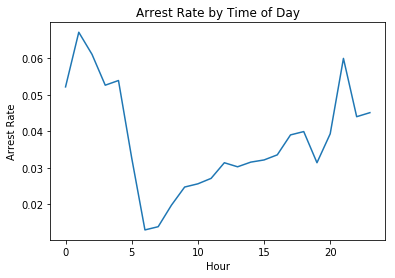

In [42]:
# Plotting the hourly arrest rate

hourly_arrest_rate.plot()

plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

plt.show()

Seems the rate of arresting is much more during the **night** compare to **day!**

### drog_related_stop

In [43]:
# Claculate the annual rate of 'drugs_related_stop'
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()
annual_drug_rate

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

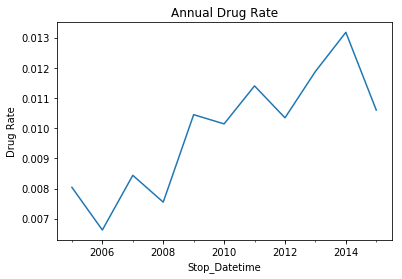

In [44]:
# Plotting the annual drug rate

annual_drug_rate.plot()

plt.xlabel('Stop_Datetime')
plt.ylabel('Drug Rate')
plt.title('Annual Drug Rate')

plt.show()

Here it might be concluded that since the search rate were increased in recent years, therefore the annual drug rate also increased. To find out the relation between these two matter, let's compare **annual_search_rate** and **annual_drug_rate**.

In [45]:
annual_search_rate = ri.search_conducted.resample('A').mean()
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [46]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

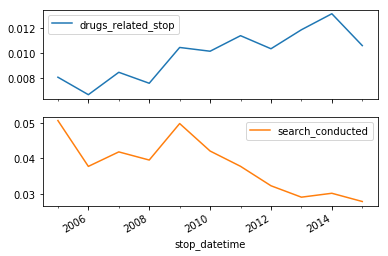

In [47]:
# Create subplots from annual
annual.plot(subplots=True)
plt.show()

Intresting!!! The **search_conducted** was decreasing in recent years while at the same time the **drugs_related_stop** was increasing. This shows that our hypothesis is wrong and the cause of this increasing is another parameter(s).

### district and violation

In [48]:
# Create a frequency table of 'district' and 'violation'
all_zones = pd.crosstab(ri.district, ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [49]:
# Select rows 'Zone K1' through 'Zone K3'
k_zones = all_zones.loc['Zone K1':'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


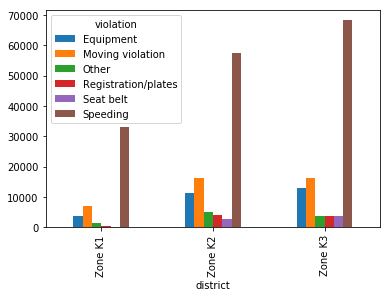

In [50]:
# Bar plot of k_zones
k_zones.plot(kind='bar')
plt.show()

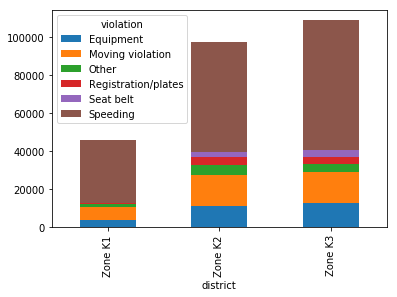

In [51]:
# Create a stackbar plot of k_zones
k_zones.plot(kind='bar', stacked=True)
plt.show()

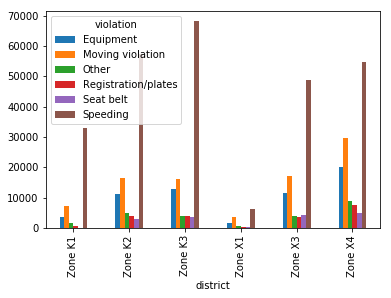

In [52]:
# Create a bar plot of all_zones
all_zones.plot(kind='bar')
plt.show()

### stop_duration

In [53]:
# Unique values of 'stop_duration'
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']


In [54]:
# Create a dictionary to map strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [55]:
# Convert 'stop_duration' strings to integers
ri['stop_minutes'] = ri.stop_duration.map(mapping)
print(ri.stop_minutes.unique())

[ 8. 23. 45. nan]


In [56]:
# Create stop_length
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
stop_length

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

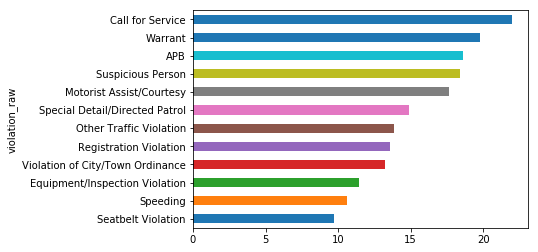

In [57]:
# Sort stop_length values and create a horizontal bar
stop_length.sort_values().plot(kind='barh')
plt.show()

In [58]:
ri.columns

Index(['stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district', 'frisk', 'stop_minutes'],
      dtype='object')

### driver_age

The IntelliSense Age Group defaults are:

* Youth (<18)

* Young Adult (18 to 35)

* Adult (36 to 55)

* Senior (56 and up)

In [83]:
# Create the column 'age_group' in DataFrame
age_group = []
for age in ri.driver_age:
    if age < 18:
        age_group.append('Youth')
    elif (age>=18) & (age<36):
        age_group.append('Young Adult')
    elif (age>=36) & (age<55):
        age_group.append('Adult')
    elif (age>=56):
        age_group.append('Senior')
    else:
        age_group.append(None)
        
ri['age_group'] = age_group

In [84]:
# The average age of driver_genders who commited a violation
ri.groupby(['driver_gender','violation']).driver_age.mean()

driver_gender  violation          
F              Equipment              31.600342
               Moving violation       33.616366
               Other                  34.624866
               Registration/plates    32.187101
               Seat belt              30.818822
               Speeding               32.468429
M              Equipment              31.830886
               Moving violation       36.643351
               Other                  40.720944
               Registration/plates    32.935951
               Seat belt              32.644893
               Speeding               33.964889
Name: driver_age, dtype: float64

In [85]:
# Create a frequency table of 'age_group' and 'violation'
age_violation = pd.crosstab(ri.age_group, ri.violation)
age_violation

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
age_group,,,,,,
Adult,15488,31454,10623,5787,3875,76902
Senior,2661,8258,2930,808,864,19220
Young Adult,42229,48608,9472,12971,11427,167238
Youth,367,491,117,105,43,2443


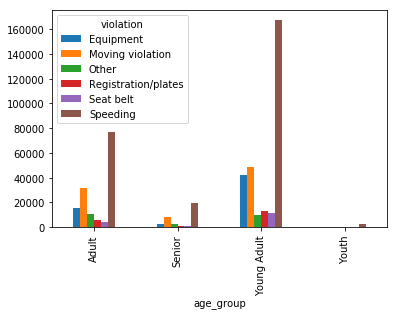

In [86]:
# Plotting the age_group's violations
age_violation.plot(kind='bar')
plt.show()

### driver_race

In [87]:
# What races are driving
ri.driver_race.unique()

array(['White', 'Black', 'Hispanic', 'Asian', 'Other'], dtype=object)

In [88]:
# Create a frequency table of 'driver_race' and 'violation'
race_violation = pd.crosstab(ri.driver_race, ri.violation)
race_violation

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_race,,,,,,
Asian,1124,1822,499,367,266,8746
Black,12391,16018,4789,4659,2443,28277
Hispanic,11828,13128,3307,4052,3025,17783
Other,99,273,93,21,11,847
White,35808,58987,15528,10731,10579,213083


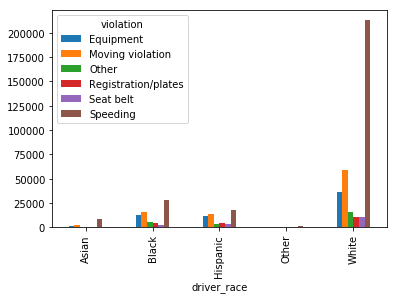

In [89]:
# Plotting the race's violation
race_violation.plot(kind='bar')
plt.show()